# Create model (CNN) and save it

#### imports

In [1]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt

#### set parameters

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

#### load data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#### scale pictures to [0, 1] range

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### show example of data

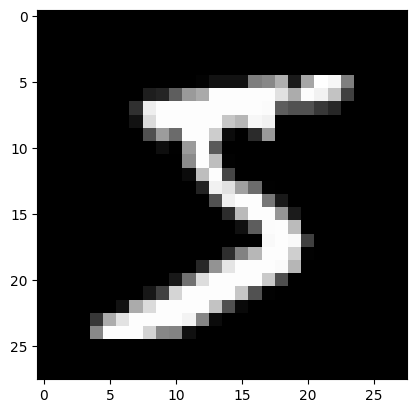

In [5]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

#### convert class vectors to binary class metrics

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)

## MLP (Multi-Layer Perceptron)

#### Transform pictures to vectors

In [17]:
x_train_simple = x_train.reshape(-1, 28 * 28)
x_test_simple = x_test.reshape(-1, 28 * 28)

#### Define model

In [21]:
model_simple = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation="softmax"),  # 10 classes for digits 0-9
])

#### Compile model

In [22]:
model_simple.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

#### Train model

In [23]:
model_simple.fit(x_train_simple, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9239 - loss: 0.2623 - val_accuracy: 0.9700 - val_loss: 0.1073
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.9671 - loss: 0.1093 - val_accuracy: 0.9712 - val_loss: 0.1000
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.9764 - loss: 0.0742 - val_accuracy: 0.9762 - val_loss: 0.0866
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.9824 - loss: 0.0574 - val_accuracy: 0.9748 - val_loss: 0.0883
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.9857 - loss: 0.0449 - val_accuracy: 0.9803 - val_loss: 0.0818


#### Evaluate model

In [24]:
test_loss, test_acc = model_simple.evaluate(x_test_simple, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.9758 - loss: 0.0873
Test accuracy: 0.9758


#### Save model

In [25]:
model_simple.save('./models/mnist_model_simple.keras')

## CNN

#### check shape (28, 28, 1)

In [7]:
x_test = np.expand_dims(x_test, -1)
x_train = np.expand_dims(x_train, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Build model

In [8]:
"""
Architecture explanation:
    - Input layer with shape 28x28x1 (grayscale images)
    - First convolutional layer with 32 filters of size 3x3
        -> scanning picture and extracting simple features such as edges or lines
        -> activation function ReLu to introduce non-linearity and to have only positive activations (learns faster)
    - MaxPooling layer with pool size 2x2
        -> takes minimum of 2x2 area, reducing spatial dimensions and computational complexity
    - Second convolutional layer with 64 filters of size 3x3
        -> learns more complex features by combining simple features from previous layer
    - Second MaxPooling layer with pool size 2x2
    - Flatten layer
        -> converts 2D feature maps into 1D feature vector for dense layers
    - Dropout layer with rate 0.5
        -> randomly sets 50% of input units to 0 during training to prevent overfitting
    - Dense output layer with softmax activation
        -> connects all features of flattened layer to each output class
        -> softmax activation provides probability distribution over 10 classes (digits 0-9)
"""
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

#### train model

In [9]:
batch_size = 128
epochs = 15

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8913 - loss: 0.3590 - val_accuracy: 0.9783 - val_loss: 0.0836
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9646 - loss: 0.1173 - val_accuracy: 0.9833 - val_loss: 0.0593
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9723 - loss: 0.0874 - val_accuracy: 0.9870 - val_loss: 0.0468
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9774 - loss: 0.0726 - val_accuracy: 0.9890 - val_loss: 0.0403
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9804 - loss: 0.0632 - val_accuracy: 0.9885 - val_loss: 0.0418
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9811 - loss: 0.0586 - val_accuracy: 0.9892 - val_loss: 0.0383
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9835 - loss: 0.0534 - val_accuracy: 0.9907 - val_loss: 0.0343
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9849 - loss: 0.0485 - val_accu

#### evaluate model

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025813085958361626
Test accuracy: 0.9907000064849854


#### save model

In [12]:
model.save('./models/mnist_model1.keras')